# Why Python for Finance?

## Zen of Python

In [37]:
import this

## The Python Ecosystem

In [38]:
100 * 2.5 + 50

300.0

In [39]:
# causes intentional error
# log(1)  

In [40]:
import math  

In [41]:
math.log(1)  

0.0

## Finance and Python Syntax

In [42]:
import math
import numpy as np  

In [43]:
S0 = 100.  
K = 105.
T = 1.0  
r = 0.05  
sigma = 0.2  

In [44]:
I = 100000  

In [45]:
np.random.seed(1000)  

In [46]:
z = np.random.standard_normal(I)  

In [47]:
ST = S0 * np.exp((r - sigma ** 2 / 2) * T + sigma * math.sqrt(T) * z)  

In [48]:
hT = np.maximum(ST - K, 0)  

In [49]:
C0 = math.exp(-r * T) * np.mean(hT)  

In [50]:
print('Value of the European call option: {:5.3f}.'.format(C0))  

Value of the European call option: 8.019.


In [51]:
%run bsm_mcs_euro.py

Value of the European call option 7.989.


## Time-to-Results

In [52]:
import numpy as np  
import pandas as pd  
from pylab import plt, mpl  

In [53]:
plt.style.use('seaborn')  
mpl.rcParams['font.family'] = 'serif'  
%config InlineBackend.figure_format = 'svg'

In [54]:
data = pd.read_csv('c:\\Users\\Matthieu\\Documents\\tr_eikon_eod_data.csv',
                  index_col=0, parse_dates=True)  
data = pd.DataFrame(data['.SPX']) 
data.dropna(inplace=True)  
data.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   .SPX    1972 non-null   float64
dtypes: float64(1)
memory usage: 30.8 KB


In [55]:
data['rets'] = np.log(data / data.shift(1))  
data['vola'] = data['rets'].rolling(252).std() * np.sqrt(252)  

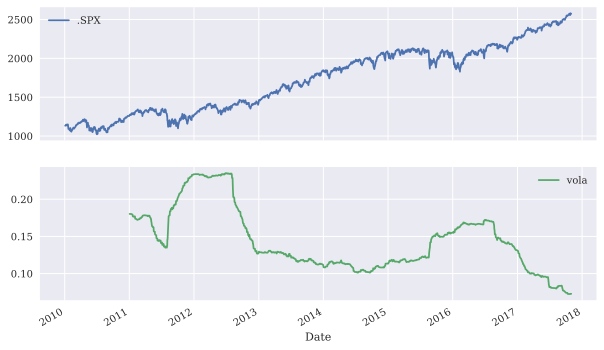

In [56]:
data[['.SPX', 'vola']].plot(subplots=True, figsize=(10, 6));  
# plt.savefig('../../images/ch01/spx_volatility.png')

## Idioms & Paradigms

In [57]:
import math
loops = 2500000
a = range(1, loops)
def f(x):
    return 3 * math.log(x) + math.cos(x) ** 2
%timeit r = [f(x) for x in a]

984 ms ± 36.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [58]:
import numpy as np
a = np.arange(1, loops)
%timeit r = 3 * np.log(a) + np.cos(a) ** 2

45.3 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [59]:
import numexpr as ne
ne.set_num_threads(1)
f = '3 * log(a) + cos(a) ** 2'
%timeit r = ne.evaluate(f)

31.2 ms ± 1.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [60]:
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)

17.4 ms ± 1.99 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Data-Driven & AI-First Finance

### Data-Driven Finance 

**This sub-section requires a license for Eikon. Therefore no code is provided.**

### AI-First Finance 

In [61]:
import numpy as np
import pandas as pd

In [62]:
data = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',
                   index_col=0, parse_dates=True)
data = pd.DataFrame(data['AAPL.O'])  
data['Returns'] = np.log(data / data.shift())  
data.dropna(inplace=True)

In [63]:
lags = 6

In [64]:
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = np.sign(data['Returns'].shift(lag))  
    cols.append(col)
data.dropna(inplace=True)

In [65]:
from sklearn.svm import SVC

In [66]:
model = SVC(gamma='scale')  

In [67]:
model.fit(data[cols], np.sign(data['Returns']))  

SVC()

In [68]:
data['Prediction'] = model.predict(data[cols])  

In [69]:
data['Strategy'] = data['Prediction'] * data['Returns']  

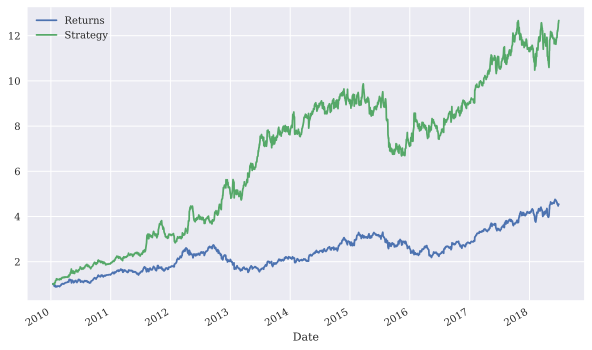

In [70]:
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));  
# plt.savefig('../../images/ch01/AAPL_trading_strategy.png');